In [1]:
from datasets import load_dataset
import numpy as np

/Users/sarathmenon/llm_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset prepration

In [39]:
dataset = load_dataset("Bingsu/Gameplay_Images")
class_labels = dataset["train"].features["label"].names
class_labels

['Among Us',
 'Apex Legends',
 'Fortnite',
 'Forza Horizon',
 'Free Fire',
 'Genshin Impact',
 'God of War',
 'Minecraft',
 'Roblox',
 'Terraria']

## Save dataset images as PNG files

In [42]:
import os
from PIL import Image

# Ensure the current directory exists for saving images
os.makedirs("all_images", exist_ok=True)

 # Create a folder for each class label
for label in class_labels:
    os.makedirs(os.path.join("saved_images", label), exist_ok=True)

# Iterate through each image in the dataset and save it
for i, item in enumerate(dataset["train"]):
    image = item["image"]
    label = class_labels[item["label"]]
    # Save the image in the corresponding class label folder
    image.save(os.path.join("saved_images", label, f"{i}.png"))

## Create JSON task file for label-studio

In [52]:
import os
import json

# Create tasks list to store the JSON tasks
tasks = []

# Iterate through each saved image and create a JSON task
for label in class_labels:
    label_dir = os.path.join("saved_images", label)
    print(f"label_dir: {label_dir}")
    for i, image_file in enumerate(os.listdir(label_dir)):
        image_path = os.path.join(label_dir, image_file)
        image_path = "/data/local-files/?d=" + image_path

        task = {
            "data": {
                "img": image_path
            },
            "annotations": [],
            "predictions": []
        }
        tasks.append(task)

# Save the tasks as a JSON file
with open("label_studio_tasks.json", "w") as f:
    json.dump(tasks, f, indent=2)

# Delete all files with ".DS_Store" extension
for label in class_labels:
    label_dir = os.path.join("saved_images", label)
    for file in os.listdir(label_dir):
        if file.endswith(".DS_Store"):
            os.remove(os.path.join(label_dir, file))


label_dir: saved_images/Among Us
label_dir: saved_images/Apex Legends
label_dir: saved_images/Fortnite
label_dir: saved_images/Forza Horizon
label_dir: saved_images/Free Fire
label_dir: saved_images/Genshin Impact
label_dir: saved_images/God of War
label_dir: saved_images/Minecraft
label_dir: saved_images/Roblox
label_dir: saved_images/Terraria


Fortnite


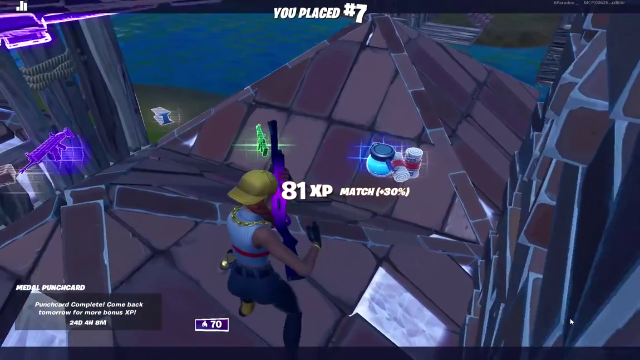

In [28]:

class_labels = dataset["train"].features["label"].names
class_id = 2
index = class_id * 1000 + np.random.randint(0, 999)

print(class_labels[dataset["train"][index]["label"]])
dataset["train"][index]["image"]